In [1]:
include("utils.jl")

commutation_matrix (generic function with 1 method)

In [10]:
using LinearAlgebra
using StatsPlots
using Kronecker

In [29]:
num_sample = 1;
d = 2;
k = 2;
alpha = 0.1;

Id_k = identity_matrix(k);
Id_kk = identity_matrix(k*k);
K_k = commutation_matrix(k, k);
P_BP_B = 2(Id_kk - K_k);
doubN_k = (Id_kk + K_k);

## Symbolics

In [25]:
using SymPy

In [26]:
A = [Sym("a$i$j") for i=1:2 for j=1:2].reshape(2,2)

2×2 Matrix{Sym}:
 a₁₁  a₁₂
 a₂₁  a₂₂

In [37]:
AA = A.T * A

2×2 Matrix{Sym}:
     a11^2 + a21^2  a₁₁⋅a₁₂ + a₂₁⋅a₂₂
 a₁₁⋅a₁₂ + a₂₁⋅a₂₂      a12^2 + a22^2

In [38]:
P_AP_A = (Id_kk + K_k) * (AA ⊕ AA)

4×4 transpose(::Matrix{Sym}) with eltype Sym:
                               2.0*a11^2 + 2.0*a21^2 + 2.0*transpose(a11)^2 + 2.0*transpose(a21)^2  …                                                                                                  0
 1.0*a11*a12 + 1.0*a21*a22 + 1.0*transpose(a11)*transpose(a12) + 1.0*transpose(a21)*transpose(a22)     1.0*a11*a12 + 1.0*a21*a22 + 1.0*transpose(a11)*transpose(a12) + 1.0*transpose(a21)*transpose(a22)
 1.0*a11*a12 + 1.0*a21*a22 + 1.0*transpose(a11)*transpose(a12) + 1.0*transpose(a21)*transpose(a22)     1.0*a11*a12 + 1.0*a21*a22 + 1.0*transpose(a11)*transpose(a12) + 1.0*transpose(a21)*transpose(a22)
                                                                                                 0                                   2.0*a12^2 + 2.0*a22^2 + 2.0*transpose(a12)^2 + 2.0*transpose(a22)^2

In [40]:
P_AP_A.eigenvals()

Dict{Any, Any} with 4 entries:
  1.0*a11^2 + 1.0*a12^2 + 1.0*a21^2 + 1.0*a22^2 - 2.82842712474619*sqrt(0.… => 1
  1.0*a11^2 + 1.0*a12^2 + 1.0*a21^2 + 1.0*a22^2 + 2.82842712474619*sqrt(0.… => 1
  1.0*a11^2 + 1.0*a12^2 + 1.0*a21^2 + 1.0*a22^2 + 1.0*transpose(a11)^2 + 1… => 1
  0                                                                         => 1

In [43]:
P = 2Matrix(Id_kk - K_k) - P_AP_A
eigvsP = P.eigenvals();

4×4 Matrix{Sym}:
                               -2.0*a11^2 - 2.0*a21^2 - 2.0*transpose(a11)^2 - 2.0*transpose(a21)^2  …                                                                                                   0
 -1.0*a11*a12 - 1.0*a21*a22 - 1.0*transpose(a11)*transpose(a12) - 1.0*transpose(a21)*transpose(a22)     -1.0*a11*a12 - 1.0*a21*a22 - 1.0*transpose(a11)*transpose(a12) - 1.0*transpose(a21)*transpose(a22)
 -1.0*a11*a12 - 1.0*a21*a22 - 1.0*transpose(a11)*transpose(a12) - 1.0*transpose(a21)*transpose(a22)     -1.0*a11*a12 - 1.0*a21*a22 - 1.0*transpose(a11)*transpose(a12) - 1.0*transpose(a21)*transpose(a22)
                                                                                                  0                                   -2.0*a12^2 - 2.0*a22^2 - 2.0*transpose(a12)^2 - 2.0*transpose(a22)^2

In [110]:
subs(collect(keys(eigvsP))[2], [(ai, randn()) for ai=vec(A)]...)

-0.435516494354536

In [98]:
eigs = collect(keys(eigvsP));

In [99]:
eigs[1]

4.00000000000000

In [100]:
eigs[2]

                                                  ____________________________
     2      2      2      2                      ╱          4           2    2
- a₁₁  - a₁₂  - a₂₁  - a₂₂  + 2.82842712474619⋅╲╱  0.125⋅a₁₁  + 0.25⋅a₁₁ ⋅a₁₂ 

______________________________________________________________________________
           2    2           2    2           2          2                2    
 + 0.25⋅a₁₁ ⋅a₂₁  - 0.25⋅a₁₁ ⋅a₂₂  + 0.25⋅a₁₁ ⋅transpose (a₁₁) - 0.25⋅a₁₁ ⋅tra

______________________________________________________________________________
      2                2          2                2          2               
nspose (a₁₂) + 0.25⋅a₁₁ ⋅transpose (a₂₁) - 0.25⋅a₁₁ ⋅transpose (a₂₂) + a₁₁⋅a₁₂

______________________________________________________________________________
                                                                              
⋅a₂₁⋅a₂₂ + a₁₁⋅a₁₂⋅transpose(a₁₁)⋅transpose(a₁₂) + a₁₁⋅a₁₂⋅transpose(a₂₁)⋅tran

________________________________________________

In [101]:
eigs[3]

     2      2      2      2            2                 2                 2  
- a₁₁  - a₁₂  - a₂₁  - a₂₂  - transpose (a₁₁) - transpose (a₁₂) - transpose (a

               2     
₂₁) - transpose (a₂₂)

In [102]:
eigs[4]

                                                  ____________________________
     2      2      2      2                      ╱          4           2    2
- a₁₁  - a₁₂  - a₂₁  - a₂₂  - 2.82842712474619⋅╲╱  0.125⋅a₁₁  + 0.25⋅a₁₁ ⋅a₁₂ 

______________________________________________________________________________
           2    2           2    2           2          2                2    
 + 0.25⋅a₁₁ ⋅a₂₁  - 0.25⋅a₁₁ ⋅a₂₂  + 0.25⋅a₁₁ ⋅transpose (a₁₁) - 0.25⋅a₁₁ ⋅tra

______________________________________________________________________________
      2                2          2                2          2               
nspose (a₁₂) + 0.25⋅a₁₁ ⋅transpose (a₂₁) - 0.25⋅a₁₁ ⋅transpose (a₂₂) + a₁₁⋅a₁₂

______________________________________________________________________________
                                                                              
⋅a₂₁⋅a₂₂ + a₁₁⋅a₁₂⋅transpose(a₁₁)⋅transpose(a₁₂) + a₁₁⋅a₁₂⋅transpose(a₂₁)⋅tran

________________________________________________

## Numerical exp


In [149]:
num_sample = 1;
d = 2;
k = 100;
alpha = 0.1;

Id_k = identity_matrix(k);
Id_kk = identity_matrix(k*k);
K_k = commutation_matrix(k, k);
P_BP_B = 2(Id_kk - K_k);
doubN_k = (Id_kk + K_k);

In [150]:
A = randn(k, k) / k
AA = A' * A
AA_AA = AA ⊕ AA;

$\lambda_{ij}(A \oplus B) = \lambda_{i}(A) + \lambda_{j}(B)$

In [151]:
eigvals(AA)[1:10]

10-element Vector{Float64}:
 3.856471307265825e-7
 6.159012506972177e-6
 1.3265722155160508e-5
 2.298895043212909e-5
 6.584207837474538e-5
 7.652203608755285e-5
 9.06872130844214e-5
 0.00015478339454704307
 0.00021138045256095857
 0.0002390574311409042

In [152]:
eigvals(AA_AA, 1:10)

InterruptException: InterruptException:

In [153]:
eigvals(K_k*AA_AA)[1:10]

In [148]:
eigvals(Matrix(Id_kk - K_k) - (Id_kk + K_k)*AA_AA)[1:10]

10-element Vector{Float64}:
 -0.27898738763126885
 -0.26931857091749767
 -0.2596497542037256
 -0.25660755630169846
 -0.24874288924129842
 -0.2469387395879273
 -0.23941066774651626
 -0.2390740725275273
 -0.23683922798152934
 -0.23422772497212882

In [4]:
eigmins = []
for i =1:100
    A = randn(k, k) / k
    P_AP_A = doubN_k*kron(Id_k, A'A)*doubN_k
    mon_para = (P_BP_B - P_AP_A)
    push!(eigmins, eigvals(mon_para)[1])
end

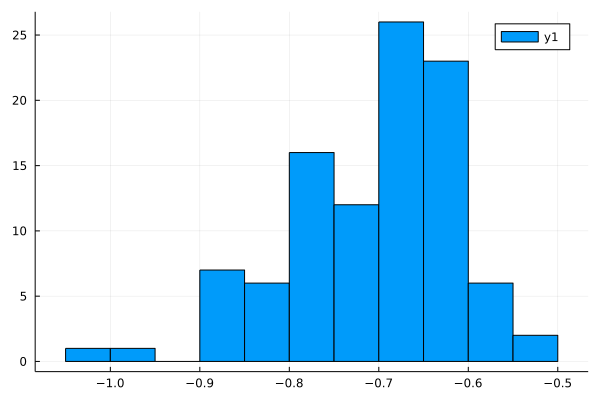

In [5]:
histogram(eigmins)